##Cleaning benin


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Load the dataset (adjust path if needed)
df = pd.read_csv('../data/benin_raw.csv', encoding='ISO-8859-1')
df.head()



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11904\2116831243.py:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/benin_raw.csv', encoding='ISO-8859-1')


In [ ]:
# List of key columns to focus on
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Convert relevant columns to numeric (errors='coerce' turns invalid values to NaN)
df[key_columns] = df[key_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with negative radiation values (GHI, DNI, DHI must be ≥ 0)
for col in ['GHI', 'DNI', 'DHI']:
    df = df[df[col] >= 0]


# Compute Z-scores for key columns
z_scores = df[key_columns].apply(zscore)

# Drop rows with any Z-score > 3 or < -3
df = df[(np.abs(z_scores) <= 3).all(axis=1)]


# Fill any remaining NaNs with column medians
df[key_columns] = df[key_columns].fillna(df[key_columns].median())


# Save to CSV
df.to_csv('../data/benin_cleaned.csv', index=False)

# Preview cleaned dataset
print(df.head())


##Cleaning sierraleone

In [ ]:
# Load data (assuming CSV format)
df = pd.read_csv('../data/sierraleone_raw.csv' ,encoding='ISO-8859-1')
df.head()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11904\1148745338.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/sierraleone_raw.csv' ,encoding='ISO-8859-1')


In [ ]:
# 1. Convert key columns to numeric, coercing errors to NaN
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[key_cols] = df[key_cols].apply(pd.to_numeric, errors='coerce')

# 2. Remove rows with negative radiation values (GHI, DNI, DHI must be >= 0)
for col in ['GHI', 'DNI', 'DHI']:
    df = df[df[col] >= 0]

# 3. Calculate Z-scores and flag outliers (|Z| > 3)
z_scores = df[key_cols].apply(zscore, nan_policy='omit')
df = df[(np.abs(z_scores) <= 3).all(axis=1)]

# 4. Impute missing values with median of each column
df[key_cols] = df[key_cols].fillna(df[key_cols].median())

df.to_csv('../data/sierraleone_cleaned.csv', index=False)

# Preview cleaned data
print(df.head())

##Cleaning Togo

In [ ]:
# Load data (assuming CSV format)
df = pd.read_csv('../data/togo_raw.csv' ,encoding='ISO-8859-1')
df.head()


In [ ]:
# 1. Convert key columns to numeric, coercing errors to NaN
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[key_cols] = df[key_cols].apply(pd.to_numeric, errors='coerce')

# 2. Remove rows with negative radiation values (GHI, DNI, DHI must be >= 0)
for col in ['GHI', 'DNI', 'DHI']:
    df = df[df[col] >= 0]

# 3. Calculate Z-scores and flag outliers (|Z| > 3)
z_scores = df[key_cols].apply(zscore, nan_policy='omit')
df = df[(np.abs(z_scores) <= 3).all(axis=1)]

# 4. Impute missing values with median of each column
df[key_cols] = df[key_cols].fillna(df[key_cols].median())

df.to_csv('../data/togo_cleaned.csv', index=False)

# Preview cleaned data
print(df.head())

##METRIC COMPARISIOM

###BOX PLOTS

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11904\4173972236.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, ax=axes[i], palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11904\4173972236.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, ax=axes[i], palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11904\4173972236.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, ax=axes[i], palette='Set2')


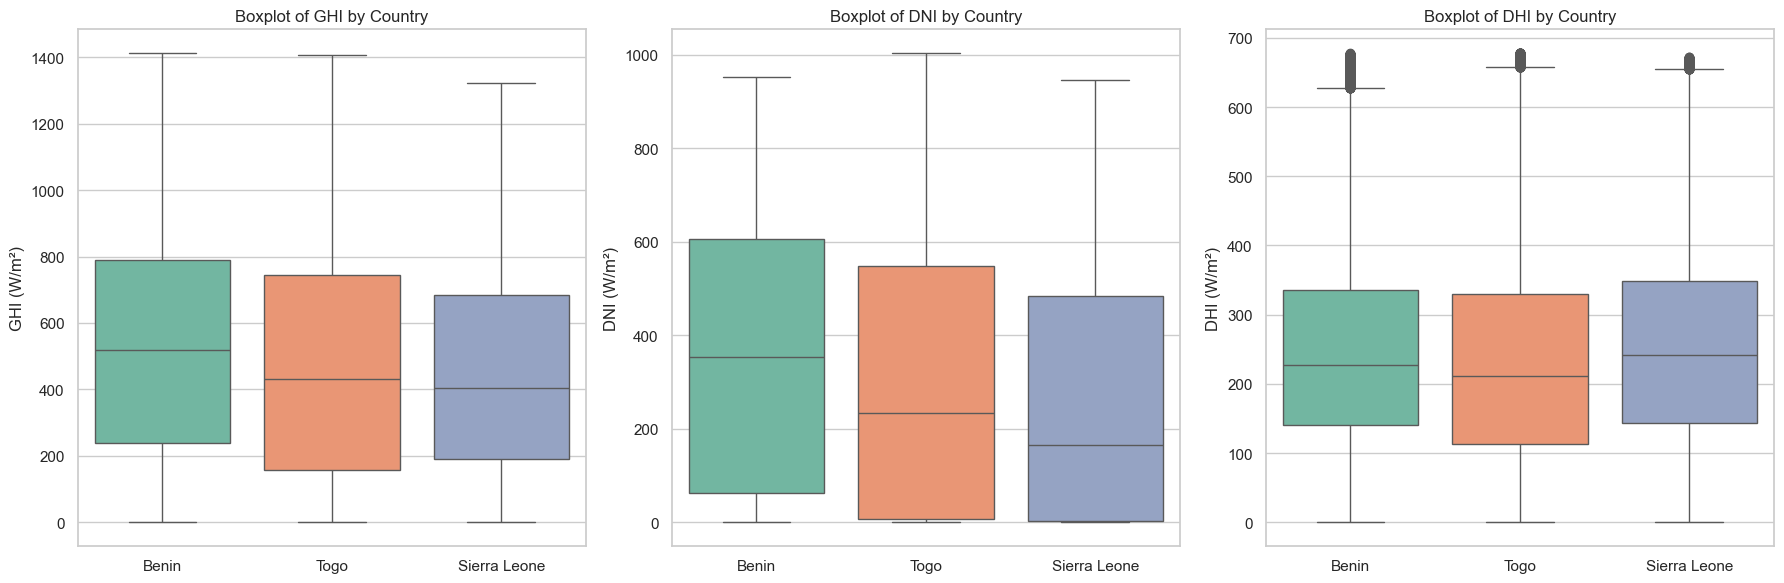

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned datasets
benin = pd.read_csv('../data/benin_cleaned.csv')
togo = pd.read_csv('../data/togo_cleaned.csv')
sierraleone = pd.read_csv('../data/sierraleone_cleaned.csv')

# Add country column to each
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierraleone['Country'] = 'Sierra Leone'

# Combine all dataframes
df_all = pd.concat([benin, togo, sierraleone], ignore_index=True)

# Set plot style
sns.set(style="whitegrid")

# Define variables to plot
metrics = ['GHI', 'DNI', 'DHI']

# Create boxplots, one for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for i, metric in enumerate(metrics):
    sns.boxplot(x='Country', y=metric, data=df_all, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {metric} by Country')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(f'{metric} (W/m²)')

plt.tight_layout()
plt.show()


###SUMMARY TABLES

In [20]:
# Combine datasets
df_all = pd.concat([benin, togo, sierraleone], ignore_index=True)

# Select relevant columns
metrics = ['GHI', 'DNI', 'DHI']

# Group by country and calculate mean, median, std
summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std'])

# Flatten multi-level columns
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]

print(summary)


                GHI_mean  GHI_median     GHI_std    DNI_mean  DNI_median  \
Country                                                                    
Benin         513.435019       520.0  304.512467  356.796444       353.0   
Sierra Leone  443.850912       404.3  293.129929  255.898440       165.2   
Togo          454.065842       430.2  318.599988  296.301174       234.2   

                 DNI_std    DHI_mean  DHI_median     DHI_std  
Country                                                       
Benin         279.577669  247.247564       227.8  142.881147  
Sierra Leone  263.108505  250.641625       242.1  140.196062  
Togo          283.077747  228.289570       211.8  149.590595  


##Statistical Testing

In [21]:
from scipy.stats import f_oneway,kruskal

# Extract GHI values
ghi_benin = benin['GHI']
ghi_togo = togo['GHI']
ghi_sierraleone = sierraleone['GHI']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(ghi_benin, ghi_togo, ghi_sierraleone)

print(f"One-way ANOVA result: F = {f_stat:.3f}, p = {p_value:.4f}")



h_stat, p_value_kruskal = kruskal(ghi_benin, ghi_togo, ghi_sierraleone)

print(f"Kruskal–Wallis test result: H = {h_stat:.3f}, p = {p_value_kruskal:.4f}")

One-way ANOVA result: F = 3699.896, p = 0.0000
Kruskal–Wallis test result: H = 7766.299, p = 0.0000


- **Benin** shows the highest **median GHI**, indicating strong and consistent solar radiation levels.
- **Sierra Leone** has the **lowest median GHI** and also exhibits **less variability**, suggesting lower solar potential.
- **Togo** displays the **greatest variability in GHI**, which might affect the reliability of solar energy production.


##VISUAL SUMMARY

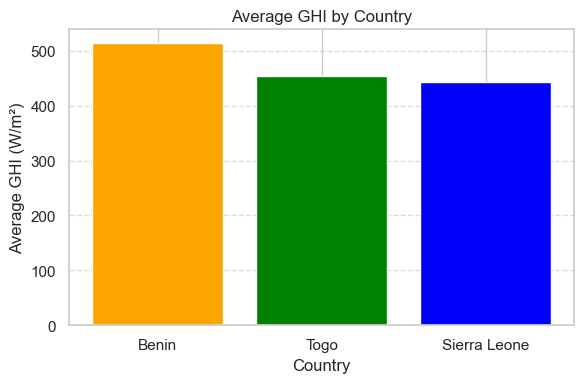

In [22]:
avg_ghi = {
    'Benin': benin['GHI'].mean(),
    'Togo': togo['GHI'].mean(),
    'Sierra Leone': sierraleone['GHI'].mean()
}

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(avg_ghi.keys(), avg_ghi.values(), color=['orange', 'green', 'blue'])
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()